In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:

df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [3]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [4]:
# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04609929078014184
Percent Type II errors: 0.17757774140752863

Test set accuracy:
Percent Type I errors: 0.05276073619631902
Percent Type II errors: 0.18773006134969325


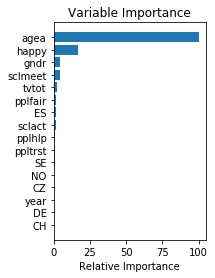

In [5]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [6]:
feature_importance

array([2.23578452e-01, 2.53427404e+00, 1.13871124e+00, 1.98688303e+00,
       1.31665636e+00, 1.70594772e+01, 4.34610159e+00, 1.52630584e+00,
       4.52310936e+00, 1.00000000e+02, 3.51298196e-02, 2.45651300e-01,
       7.35360400e-02, 1.90353514e+00, 4.03632751e-01, 7.15130535e-01])

In [7]:
print((df['partner']).value_counts())

1.0    5013
2.0    3134
Name: partner, dtype: int64


In [8]:
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.1, 
                                                    random_state=42)

In [9]:
y_train_df = y_train.to_frame()

training = y_train_df.join(X_train)

print((training['partner']).value_counts())

0.0    4520
1.0    2812
Name: partner, dtype: int64


In [10]:
training_minority = training[training.partner==1]
training_majority = training[training.partner==0]

from sklearn.utils import resample

training_minority_upsampled = resample(training_minority,
                                      replace = True, 
                                      n_samples = 4520,
                                      random_state = 123)

training_upsampled = pd.concat([training_majority, training_minority_upsampled])

training_upsampled.partner.value_counts()

1.0    4520
0.0    4520
Name: partner, dtype: int64

In [11]:
training.head()

,partner,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
4860,0.0,7,7.0,5.0,5.0,5.0,8.0,4.0,3.0,1.0,41.0,0,0,0,1,0,0
3257,1.0,6,4.0,8.0,8.0,8.0,9.0,7.0,3.0,2.0,18.0,0,0,0,1,0,0
82,1.0,6,2.0,4.0,5.0,5.0,9.0,7.0,3.0,2.0,35.0,1,0,0,0,0,0
1828,0.0,6,7.0,8.0,9.0,3.0,7.0,6.0,1.0,2.0,25.0,0,1,0,0,0,0
674,1.0,6,1.0,3.0,6.0,4.0,7.0,5.0,3.0,2.0,20.0,1,0,0,0,0,0


In [12]:
X_train_upsampled = training.drop(['partner'], 1)
y_train_upsampled = training['partner']

In [13]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

clf2 = ensemble.GradientBoostingClassifier(**params)
clf2.fit(X_train_upsampled, y_train_upsampled)

predict_train = clf2.predict(X_train_upsampled)
predict_test = clf2.predict(X_test)

table_train = pd.crosstab(y_train_upsampled, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04609929078014184
Percent Type II errors: 0.17757774140752863

Test set accuracy:
Percent Type I errors: 0.05276073619631902
Percent Type II errors: 0.18773006134969325


Upsampling the minority class did not improve either type error.

In [14]:
params = {'n_estimators': 1000,
          'max_depth': 2,
          'loss': 'deviance'}

clf3 = ensemble.GradientBoostingClassifier(**params)
clf3.fit(X_train_upsampled, y_train_upsampled)

predict_train = clf3.predict(X_train_upsampled)
predict_test = clf3.predict(X_test)

table_train = pd.crosstab(y_train_upsampled, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04487179487179487
Percent Type II errors: 0.16953082378614293

Test set accuracy:
Percent Type I errors: 0.05644171779141104
Percent Type II errors: 0.18527607361963191


In [15]:
params = {'n_estimators': 1000,
          'max_depth': 2,
          'loss': 'deviance'}

clf4 = ensemble.GradientBoostingClassifier(**params)
clf4.fit(X_train, y_train)

predict_train = clf4.predict(X_train)
predict_test = clf4.predict(X_test)

table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04487179487179487
Percent Type II errors: 0.16953082378614293

Test set accuracy:
Percent Type I errors: 0.05644171779141104
Percent Type II errors: 0.18527607361963191


Doubling the number of iterations did not significantly improve the accuracy. There was absolutely no difference between the test and upsampled test datasets.

In [16]:
params = {'n_estimators': 1000,
          'max_depth': 4,
          'loss': 'deviance'}

clf5 = ensemble.GradientBoostingClassifier(**params)
clf5.fit(X_train, y_train)

predict_train = clf5.predict(X_train)
predict_test = clf5.predict(X_test)

table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.011320240043644299
Percent Type II errors: 0.08333333333333333

Test set accuracy:
Percent Type I errors: 0.08098159509202454
Percent Type II errors: 0.17300613496932515


Increasing max depth resulted in overfitting.

Overall, was not successful in improving the model accuracy in any of the 3 approaches tried.